In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import timm

import random


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim import lr_scheduler

import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2

In [24]:
from mlops_lukianenko import dataset

In [25]:
# Использование GPU по желанию

if torch.cuda.is_available():
  device = torch.device('cuda')
  print('Работаем на GPU')
else:
  device = torch.device('cpu')
  print('Работаем на CPU')


Работаем на GPU


In [26]:
data_dir = './dataset'

In [27]:
transform_pipeline = dataset.get_transforms_pipeline()

In [28]:
train_dataset, test_dataset = dataset.get_datasets(data_dir, transform_pipeline)

In [29]:
# Создаем DataLoader
train_loader, test_loader = dataset.get_loaders(train_dataset, test_dataset)

In [30]:
print("Данные разделены и подготовлены.")

Данные разделены и подготовлены.


In [31]:
from mlops_lukianenko import plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5179958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].
Clipping input da

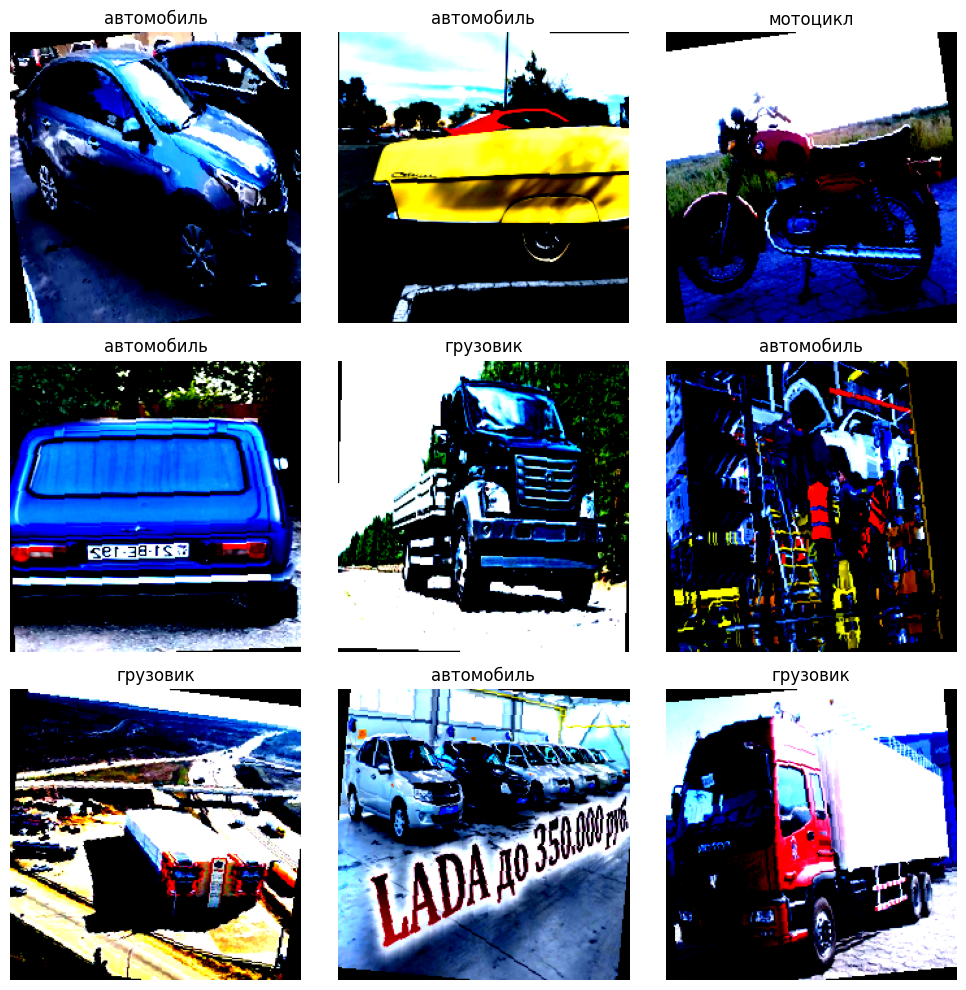

In [32]:
plots.show_random_classes(train_dataset,3)

In [33]:
model_name = "resnet50"  # Выбранная модель
pretrained_model = timm.create_model(model_name, pretrained=True)

In [34]:
from mlops_lukianenko.modeling import train

In [35]:

train.freeze_params(pretrained_model)

In [36]:
classes = ["автомобиль", "мотоцикл", "автобус", "грузовик"]
# Замена "головы" модели
num_classes = len(classes)  # Количество классов в задаче классификации
train.swap_head(pretrained_model, num_classes)


In [37]:
print("Модель подготовлена.")

Модель подготовлена.


In [38]:
# Подготовка для обучения
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pretrained_model.parameters(), lr=0.001)

In [39]:
# Добавляем планировщик скорости обучения
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Каждые 3 эпохи lr уменьшается в 10 раз

In [40]:
pretrained_model = pretrained_model.to(device)
# Параметры обучени
num_epochs = 10

In [ ]:
train.train_freezed(pretrained_model, num_epochs, train_loader, test_loader, device, loss_fn, optimizer, scheduler)

Freezed training Epoch 1/10
Freezed training Training loss: 1.1991869187355042
Test Accuracy: 73.00%
Fine-Tuning
Freezed training Epoch 2/10
Freezed training Training loss: 0.7788999199867248
Test Accuracy: 82.00%
Fine-Tuning
Freezed training Epoch 3/10
Freezed training Training loss: 0.5348958873748779
Test Accuracy: 82.00%
Fine-Tuning
Freezed training Epoch 4/10
Freezed training Training loss: 0.49424242436885835
Test Accuracy: 78.00%
Fine-Tuning
Freezed training Epoch 5/10
Freezed training Training loss: 0.46767255902290344
Test Accuracy: 78.00%
Fine-Tuning
Freezed training Epoch 6/10


In [ ]:
train.unfreeze(pretrained_model)

In [ ]:
num_epochs=5
train.train_fine_tune(num_epochs, pretrained_model, train_loader, test_loader, device, loss_fn, optimizer, scheduler)